facenet -pytorch 다운

In [3]:
pip install facenet-pytorch


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.9 MB 11.5 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 12.0 MB/s eta 0:00:01
     |████████████████████████████████| 755.5 MB 33 kB/s s eta 0:00:01
     |████████████████████████████████| 731.7 MB 26 kB/s s eta 0:00:01
     |████████████████████████████████| 167.9 MB 12.9 MB/s eta 0:00:01
     |████████████████████████████████| 166.0 MB 138 kB/s  eta 0:00:01
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.5.0
    Uninstalling typing-extensions-4.5.0:
      Successfully uninstalled typing-extensions-4.5.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 5.1.5 requires pyqt5<5.13, which is not installed.
spyder 5.1.5 requires pyqtwebengine<5.13, which is not installed.
tenso

In [22]:
from facenet_pytorch import MTCNN, InceptionResnetV1

ModuleNotFoundError: No module named 'facenet_pytorch'

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2
from PIL import Image
import os

In [4]:
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
import cv2
import os

In [5]:
image_folder = "/content/images"

# 이미지 파일 리스트
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith(('centerlight', 'glasses', 'happy',
                                                                                              'leftlight','noglasses','normal',
                                                                                              'rightlight','sad','sleepy','surprised'
                                                                                              ,'wink'))]


 폴더 (data) 에 위치한 데이터 파일들을 읽어서 크기 조정 

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

y = []
X = []

for filename in image_files:
    if filename != "Readme.txt":
        # 이미지 읽기
        b = plt.imread(os.path.join(filename))

        # 크기 조정 (224x224)
        b = cv2.resize(b, (112, 112), interpolation=cv2.INTER_AREA)

        # 흑백은 (224, 224) 형태
        if b.shape == (112, 112):  # 흑백 확인
            y.append(int(filename[23:25]))
            X.append(b)

In [9]:
data=[]
for i in range(1,16):
    person=[]
    for u in range(len(y)):
        if y[u]==i:

            person.append(X[u])
    data.append(person)

이미지 세트 보여줌

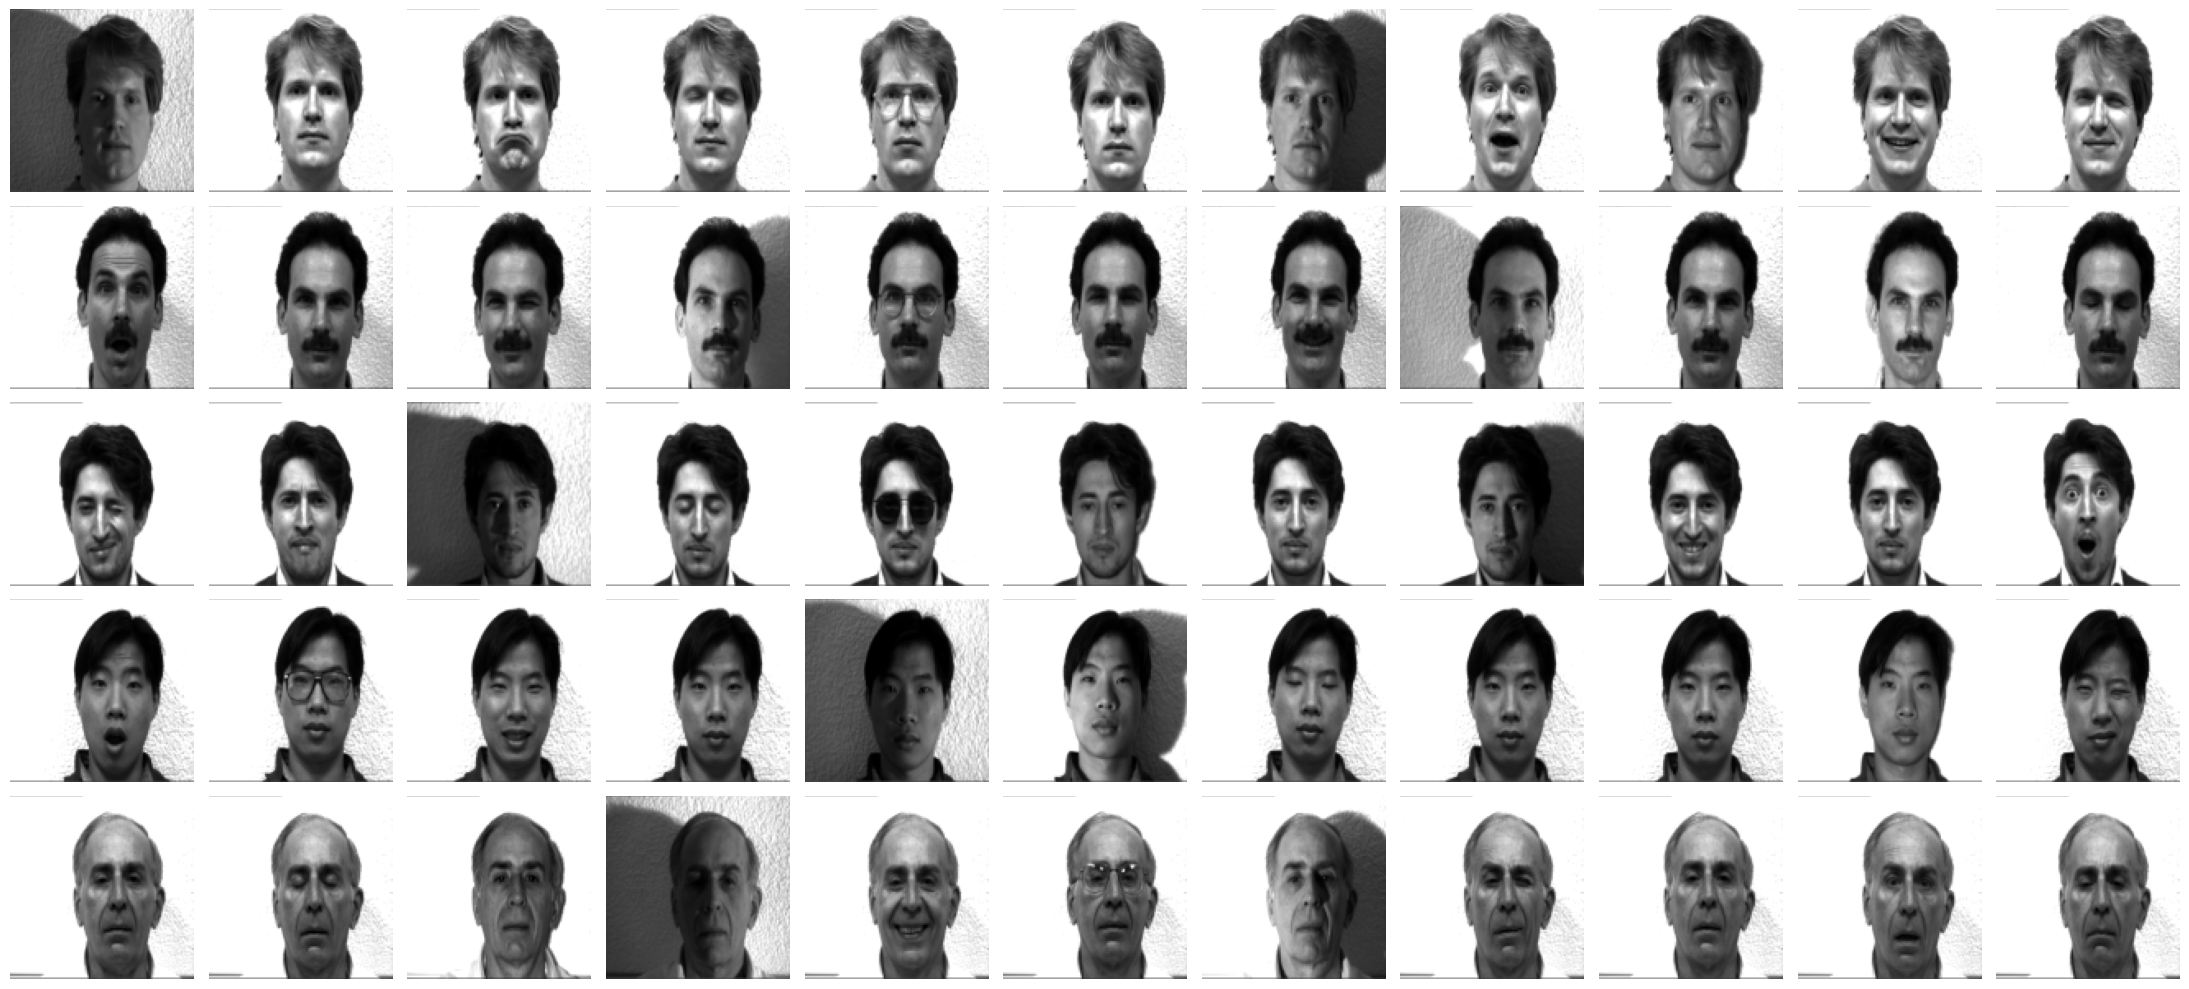

In [11]:
import matplotlib.pyplot as plt

# 데이터가 있다고 가정 (data[z][i]에 이미지 배열이 있음)
num_rows = 5  # 행 개수 (z의 범위)
num_images = len(data[0])  # 각 행에서 표시할 이미지 수

plt.figure(figsize=(num_images * 2, num_rows * 2))  # 크기 설정

for z in range(num_rows):  # 행 반복
    for i in range(num_images):  # 열 반복
        # subplot의 위치 계산
        plt.subplot(num_rows, num_images, z * num_images + i + 1)
        plt.imshow(data[z][i],'gray')  # 이미지 표시
        plt.axis('off')  # 축 제거

plt.tight_layout()  # 간격 조정
plt.show()


Robust pca 코드

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2

In [ ]:

def shrink(X,tau):
    Y = np.abs(X)-tau
    return np.sign(X) * np.maximum(Y,np.zeros_like(Y))

def SVT(X,tau):
    U,S,VT = np.linalg.svd(X,full_matrices=0)
    out = U @ np.diag(shrink(S,tau)) @ VT
    return out

def RPCA(X):
    n1,n2 = X.shape
    mu = n1*n2/(4*np.sum(np.abs(X.reshape(-1))))
    lambd = 1/np.sqrt(np.maximum(n1,n2))
    thresh = 10**(-7) * np.linalg.norm(X)

    S = np.zeros_like(X)
    Y = np.zeros_like(X)
    L = np.zeros_like(X)
    count = 0
    while (np.linalg.norm(X-L-S) > thresh) and (count < 1000):
        L = SVT(X-S+(1/mu)*Y,1/mu)
        S = shrink(X-L+(1/mu)*Y,lambd/mu)
        Y = Y + mu*(X-L-S)
        count += 1
    return L,S

In [ ]:
#imgs = np.concatenate(data[1])
imgs =np.concatenate([data[1][i] for i in range(1, 11)])
D, S = RPCA(imgs)

In [ ]:
D.shape

(2240, 224)

Robust pca 으로  나온 low rank matrix 의 특이값 분표 그래프

Low-rank 행렬 L의 랭크: 85


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44050 (\N{HANGUL SYLLABLE GABS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51032 (\N{HANGUL SYLLABLE YI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48516 (\N{HANGUL SYLLABLE BUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/I

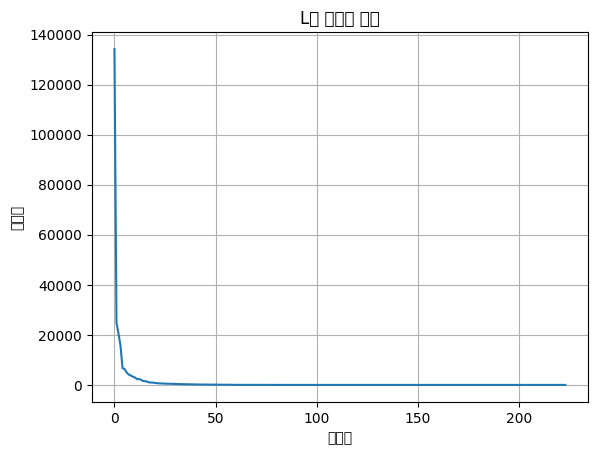

In [ ]:
rank_L = np.linalg.matrix_rank(D)
print(f"Low-rank 행렬 L의 랭크: {rank_L}")

# 특이값 분포 확인
U, singular_values, VT = np.linalg.svd(D)
plt.plot(singular_values)
plt.title("L의 특이값 분포")
plt.xlabel("인덱스")
plt.ylabel("특이값")
plt.grid(True)
plt.show()

Robust pca  low rank matrix 결과 

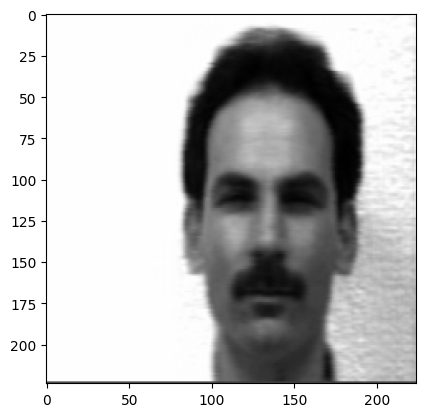

In [ ]:

plt.imshow(D[-224:],'gray')

Robust pca 에 10개의 데이터 셋트 넣고 실험함

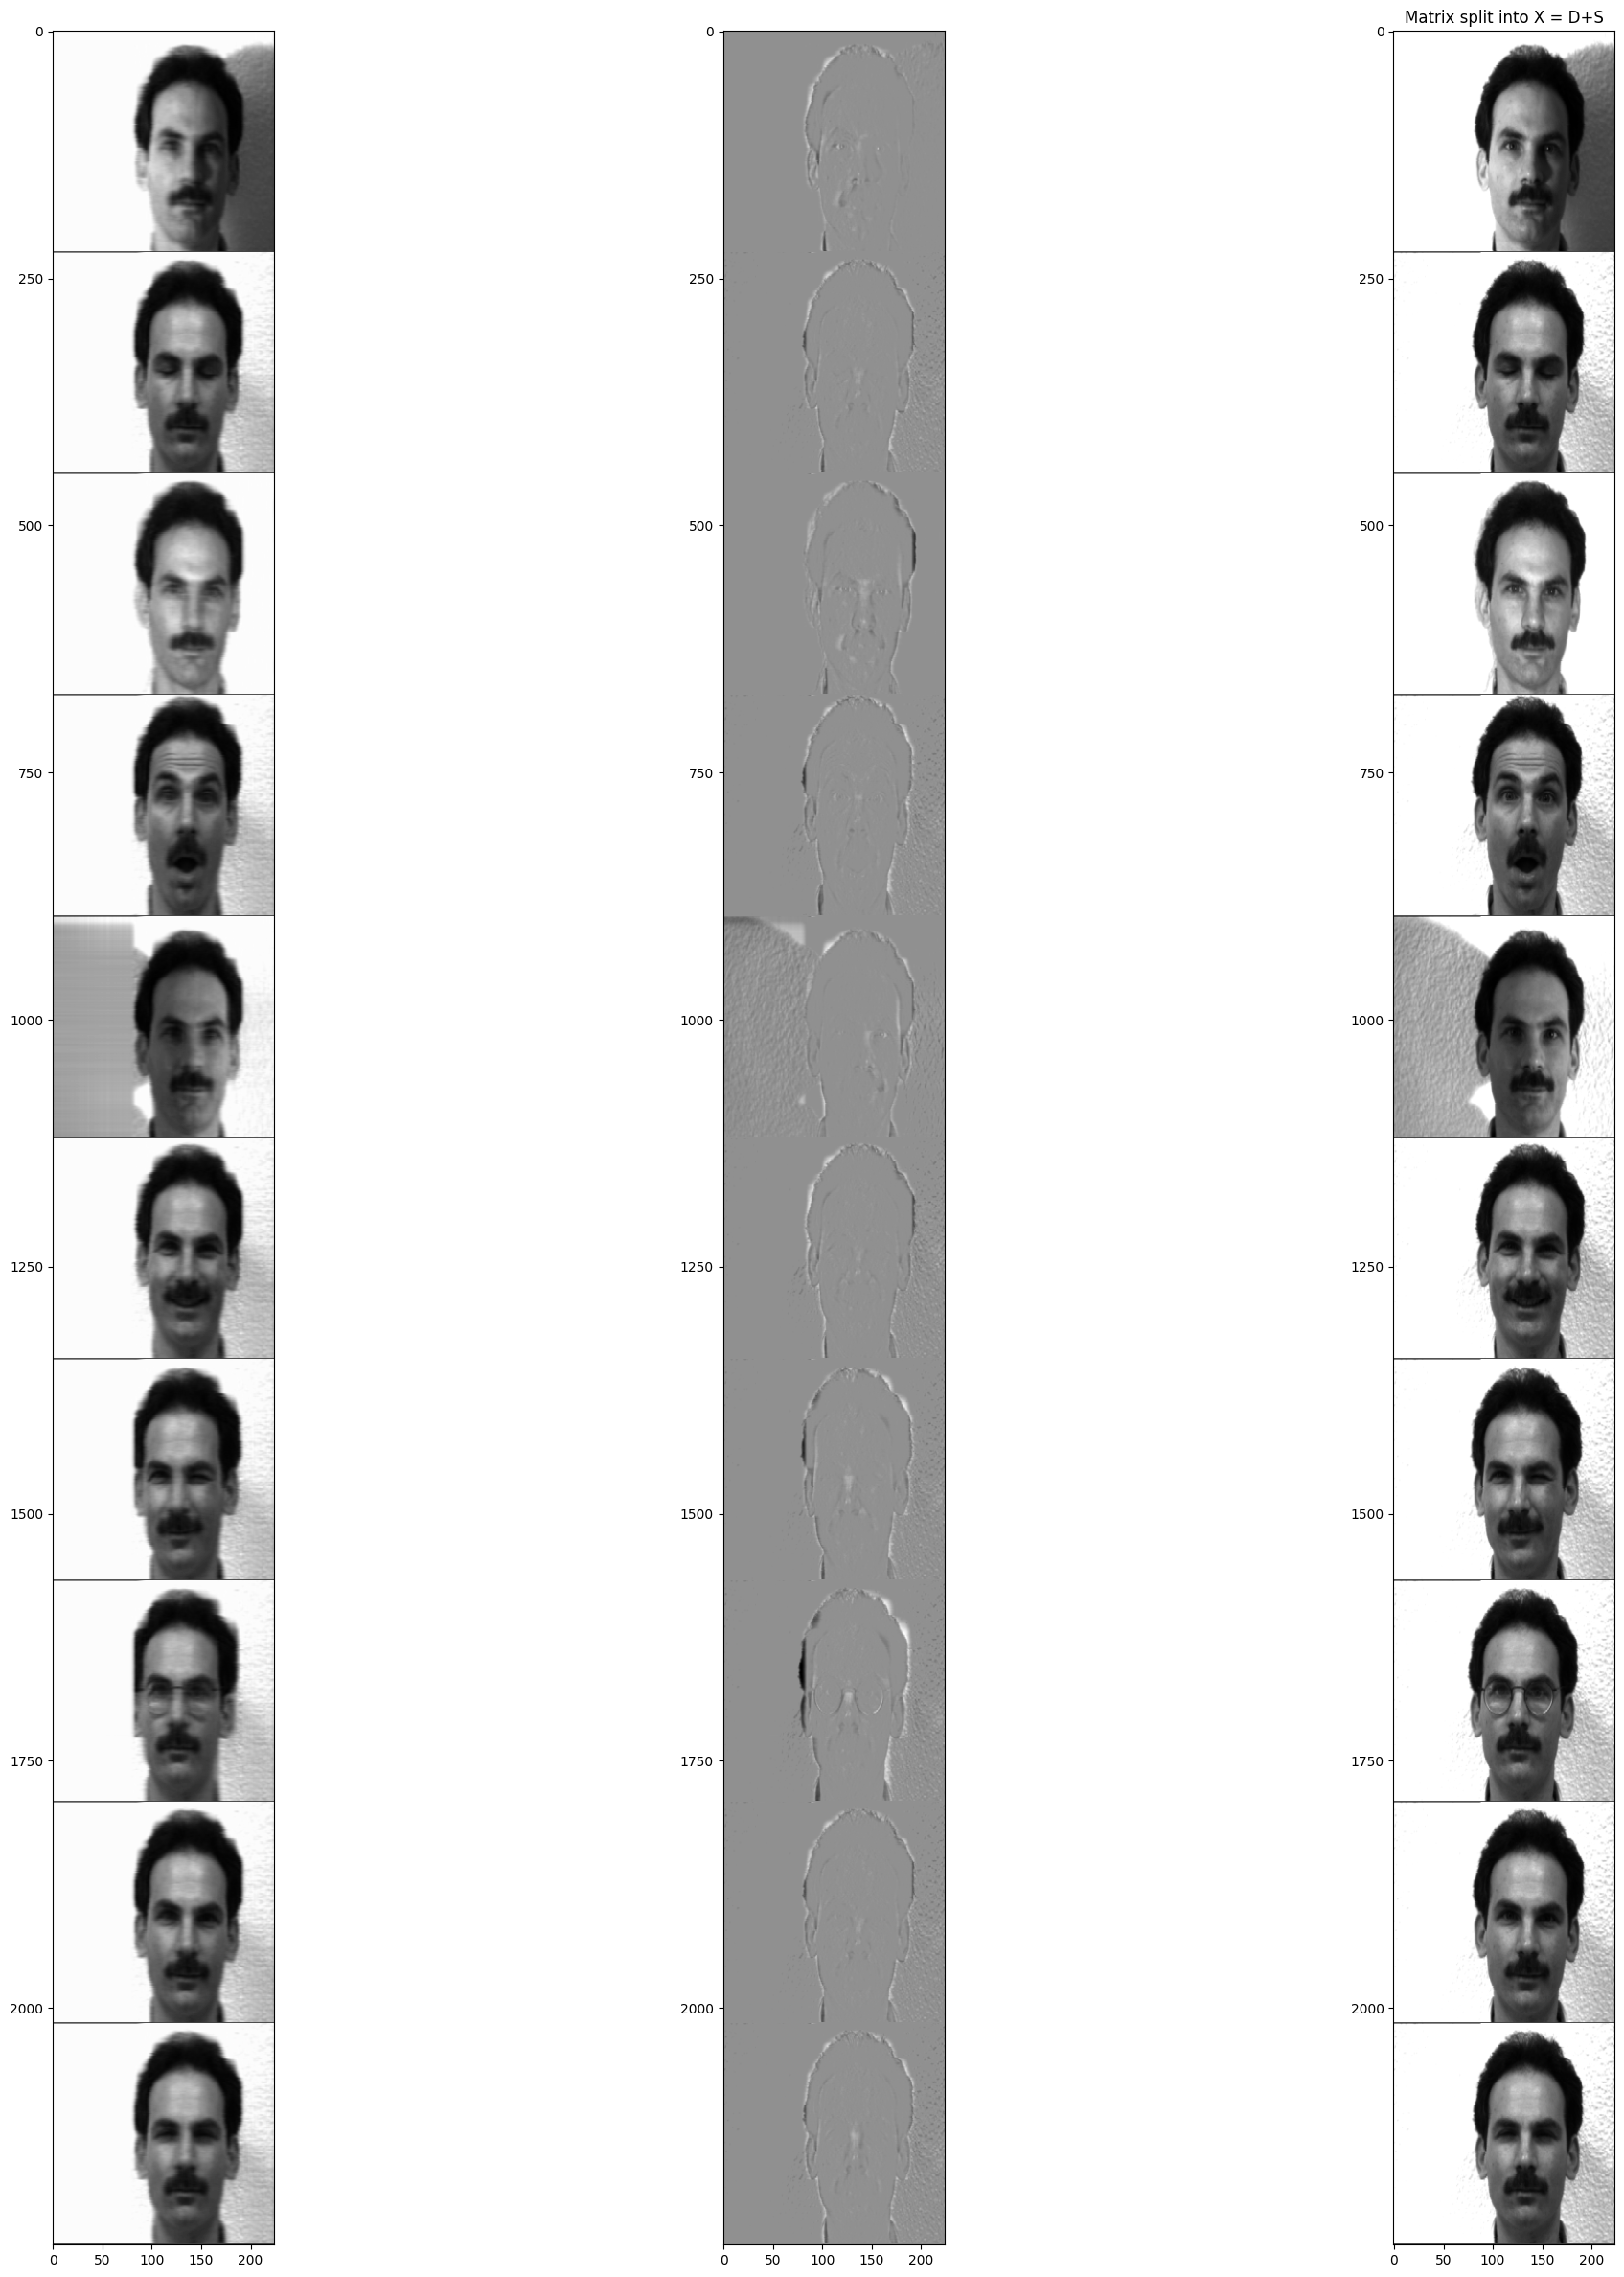

In [ ]:
ffig, ax = plt.subplots(1,3,figsize=(27,30))
ffig.subplots_adjust(wspace=0.01, hspace=0.01)
plt.title('Matrix split into X = D+S')
ax[0].imshow(D,'gray')
ax[1].imshow(S,'gray')
ax[2].imshow(D+S,'gray')

Sparse pca 실험

In [46]:
imgs =np.concatenate([data[1][i] for i in range(1, 4)])
print(imgs.shape)
X = imgs.reshape(3, -1)
X.shape

(336, 112)


(3, 12544)

In [ ]:
from sklearn.decomposition import SparsePCA
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

##scaler = StandardScaler()
##X_scaled = scaler.fit_transform(X)



n_components = 8
spca = SparsePCA(n_components=n_components, alpha=1, random_state=42)
X_transformed = spca.fit_transform(X)
components = spca.components_

reconstructed_images = []
for i in range(1, n_components + 1):
    reconstruction = np.dot(X_transformed[:, :i], components[:i, :])  # i개의 주성분으로 복원
    reconstructed_images.append(reconstruction)

# 원본 데이터 중 첫 번째 이미지 선택
original_image = X[0].reshape(112, 112)

# 시각화
fig, axes = plt.subplots(1, n_components + 1, figsize=(20, 5))
axes[0].imshow(original_image, cmap='gray')  # 원본 이미지
axes[0].set_title("Original")

for i, img in enumerate(reconstructed_images):
    axes[i + 1].imshow(img[0].reshape(112, 112), cmap='gray')  # 첫 번째 데이터 복원 결과
    axes[i + 1].set_title(f"{i + 1} Components")

plt.tight_layout()
plt.show()



In [ ]:
len(reconstructed_images)

8

In [ ]:
original_image = X[0].reshape(224, 224)

# 시각화
fig, axes = plt.subplots(1, n_components + 1, figsize=(20, 5))
axes[0].imshow(original_image, cmap='gray')  # 원본 이미지
axes[0].set_title("Original")

for i, img in enumerate(reconstructed_images):
    axes[i + 1].imshow(img[0].reshape(224, 224), cmap='gray')  # 첫 번째 데이터 복원 결과
    axes[i + 1].set_title(f"{i + 1} Components")

plt.tight_layout()
plt.show()

In [4]:
pip install keras-facenet

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 2.3 MB 8.1 MB/s eta 0:00:01
  Created wheel for keras-facenet: filename=keras_facenet-0.3.2-py3-none-any.whl size=10385 sha256=5cd1d32611f40a7b8da1b726ac538f48ce188026162634de8f7e7b42ebf1deeb
  Stored in directory: /home/aix23905/.cache/pip/wheels/73/5d/41/90b5d28ca667cfc4748ae859fa4f0b85b936d73207a073ded5
Successfully built keras-facenet
Note: you may need to restart the kernel to use updated packages.


In [37]:
import os
file_path = "/home/aix23905/bigdata_w/facenet_keras.h5"
print(f"File size: {os.path.getsize(file_path)} bytes")


File size: 92397640 bytes


In [7]:
import os

# 이미지 폴더 경로
image_folder = r"/home/aix23905/bigdata_w/data"

# 이미지 파일 리스트 생성
image_files = [os.path.join(image_folder, f) for f in os.listdir(image_folder) 
               if f.endswith(('.centerlight', '.glasses', '.happy',
                              '.leftlight', '.noglasses', '.normal',
                              '.rightlight', '.sad', '.sleepy',
                              '.surprised', '.wink'))]

# 결과 확인
print(image_files)

['/home/aix23905/bigdata_w/data/subject05.normal', '/home/aix23905/bigdata_w/data/subject09.centerlight', '/home/aix23905/bigdata_w/data/subject01.leftlight', '/home/aix23905/bigdata_w/data/subject04.wink', '/home/aix23905/bigdata_w/data/subject15.happy', '/home/aix23905/bigdata_w/data/subject15.centerlight', '/home/aix23905/bigdata_w/data/subject15.rightlight', '/home/aix23905/bigdata_w/data/subject03.leftlight', '/home/aix23905/bigdata_w/data/subject06.normal', '/home/aix23905/bigdata_w/data/subject14.normal', '/home/aix23905/bigdata_w/data/subject07.glasses', '/home/aix23905/bigdata_w/data/subject04.normal', '/home/aix23905/bigdata_w/data/subject06.surprised', '/home/aix23905/bigdata_w/data/subject11.centerlight', '/home/aix23905/bigdata_w/data/subject13.rightlight', '/home/aix23905/bigdata_w/data/subject12.normal', '/home/aix23905/bigdata_w/data/subject09.noglasses', '/home/aix23905/bigdata_w/data/subject04.rightlight', '/home/aix23905/bigdata_w/data/subject05.surprised', '/home/ai

In [12]:
image_files[1][37:39]

'09'

In [13]:
import os
import cv2
import matplotlib.pyplot as plt

y = []
X = []

for filename in image_files:
    if filename != "Readme.txt":
        # 이미지 읽기
        b = plt.imread(os.path.join(filename))


        b= cv2.cvtColor(b,cv2.COLOR_GRAY2RGB) 
        # 크기 조정 (224x224)
        b = cv2.resize(b, (160, 160), interpolation=cv2.INTER_AREA)

        # 흑백은 (224, 224) 형태
        if b.shape == (160, 160,3):  # 흑백 확인
            y.append(int(filename[37:39]))
            X.append(b)

In [16]:
data2=[]
for i in range(1,16):
    person=[]
    for u in range(len(y)):
        if y[u]==i:
            
            person.append(X[u])
    data2.append([person, i*len(person)])
    print(str(len(person))+" images  for class "+ str(i))

11 images  for class 1
11 images  for class 2
11 images  for class 3
11 images  for class 4
11 images  for class 5
11 images  for class 6
11 images  for class 7
11 images  for class 8
11 images  for class 9
11 images  for class 10
11 images  for class 11
11 images  for class 12
11 images  for class 13
11 images  for class 14
11 images  for class 15


In [19]:
import numpy as np
from skimage.color import rgb2gray
from skimage.transform import resize
import cv2
import os

In [20]:
import random 
random.seed(42)
newX1=[]
newX2=[]
newY=[]
for i in range(len(data2)):
    parts= int(len(data2[i][0])/2)
    
    #positive sampling
    for u in range(parts):
        
        newX1.append(data2[i][0][u])
        newX2.append(data2[i][0][u+parts])
        newY.append(0)
        
        
    
    #negative sampling
    for uu in range(parts):
        
        numbers = list(range(0,i)) + list(range(i+1,11))
        r = random.choice(numbers)
        g = random.randint(0,len(data2[r][0])-1)
        newX1.append(data2[i][0][uu])
        newX2.append(data2[r][0][g])
        newY.append(1)

print("Target values count: "+ str(np.unique(newY, return_counts=True)))

Target values count: (array([0, 1]), array([75, 75]))


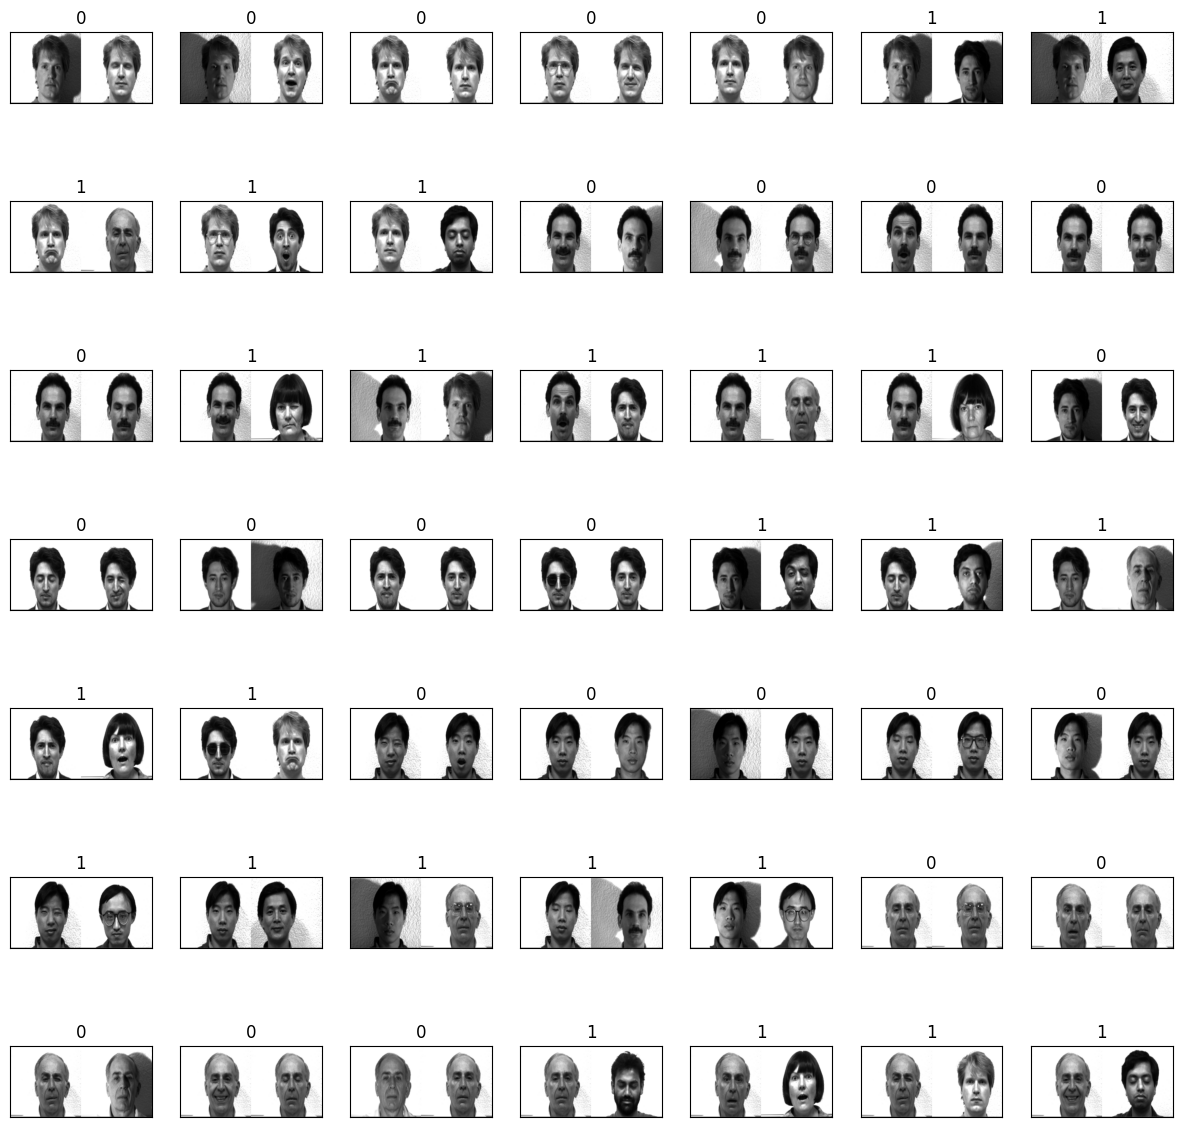

In [21]:
fig=plt.figure(figsize=(15, 15))
columns = 7
rows = 7
for i in range(1, columns*rows +1):
    ax=fig.add_subplot(rows, columns, i)
    
    plt.imshow(np.concatenate([newX1[i-1],newX2[i-1]], axis=1),'gray')
    ax.title.set_text(newY[i-1])
    ax.set_xticks([])
    ax.set_yticks([])
plt.show()

In [22]:
c = list(zip(newX1, newX2, newY))

random.shuffle(c)

a, b, y = zip(*c)
    

In [24]:
a[1].shape

(160, 160, 3)

# Facenet 으로 실행

In [ ]:
from PIL import Image
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

# Initialize MTCNN and ResNet
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='casia-webface').eval()
sum=0
for i in range(150): 
 # Load or create example images (replace with your images)
 img1_array = a[i]  # Replace with your image
 img2_array = b[i]  # Replace with your image
 img1 = Image.fromarray(img1_array)
 img2 = Image.fromarray(img2_array)
 
 # Detect faces and extract embeddings
 aligned1 = mtcnn(img1)
 aligned2 = mtcnn(img2)
 
 if aligned1 is not None and aligned2 is not None:
     embeddings1 = resnet(aligned1.unsqueeze(0)).detach()  # Add batch dimension
     embeddings2 = resnet(aligned2.unsqueeze(0)).detach()
     
     # Calculate the Euclidean distance
     distance = (embeddings1 - embeddings2).norm().item()
     if distance < 1.0:  # Adjust threshold as needed
        sum+=1
    
       
 

In [ ]:
plt.imshow(a[0])

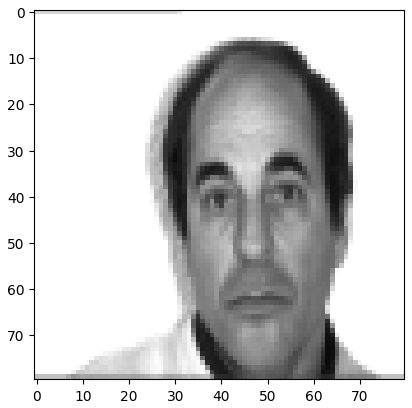

In [ ]:
grayscale_image = cv2.cvtColor(a[0], cv2.COLOR_RGB2GRAY)
D, S = RPCA(grayscale_image)


In [ ]:
D_uint8 = D.astype(np.uint8)
img1_array = cv2.cvtColor(D_uint8, cv2.COLOR_GRAY2RGB)

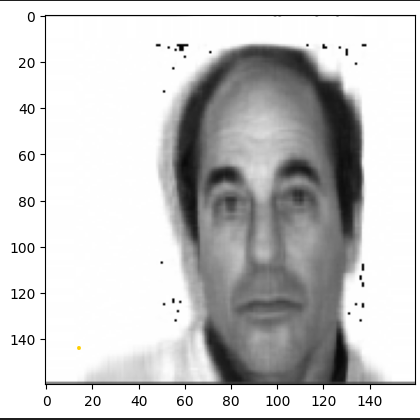

일반 facenet

In [ ]:
       
from PIL import Image
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1

# Initialize MTCNN and ResNet
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='casia-webface').eval()
sum=0
for i in range(150): 
 # Load or create example images (replace with your images)
 img1_array = a[i]  # Replace with your image
 img2_array = b[i]  # Replace with your image
 img1 = Image.fromarray(img1_array)
 img2 = Image.fromarray(img2_array)
 
 # Detect faces and extract embeddings
 aligned1 = mtcnn(img1)
 aligned2 = mtcnn(img2)
 
 if aligned1 is not None and aligned2 is not None:
     embeddings1 = resnet(aligned1.unsqueeze(0)).detach()  # Add batch dimension
     embeddings2 = resnet(aligned2.unsqueeze(0)).detach()
     
     # Calculate the Euclidean distance
     distance = (embeddings1 - embeddings2).norm().item()
     if distance < 1.0:  # Adjust threshold as needed
        sum+=1

Rpca+ facenet

In [ ]:
from PIL import Image
import numpy as np
import torch
from facenet_pytorch import MTCNN, InceptionResnetV1
import cv2


# Initialize MTCNN and ResNet
mtcnn = MTCNN()
resnet = InceptionResnetV1(pretrained='casia-webface').eval()
sum=0
for i in range(10): 
 # Load or create example images (replace with your images)

 grayscale_image = cv2.cvtColor(a[i], cv2.COLOR_RGB2GRAY)
 D, S = RPCA(grayscale_image)
 D_uint8 = D.astype(np.uint8)
 img1_array = cv2.cvtColor(D_uint8, cv2.COLOR_GRAY2RGB)
 
 grayscale_image = cv2.cvtColor(b[i], cv2.COLOR_RGB2GRAY)
 D1, S1 = RPCA(grayscale_image)
 D_uint82 = D1.astype(np.uint8)
 img2_array = cv2.cvtColor(D_uint82, cv2.COLOR_GRAY2RGB)

 img1 = Image.fromarray(img1_array)
 img2 = Image.fromarray(img2_array)
 
 # Detect faces and extract embeddings
 aligned1 = mtcnn(img1)
 aligned2 = mtcnn(img2)
 
 if aligned1 is not None and aligned2 is not None:
     embeddings1 = resnet(aligned1.unsqueeze(0)).detach()  # Add batch dimension
     embeddings2 = resnet(aligned2.unsqueeze(0)).detach()
     
     # Calculate the Euclidean distance
     distance = (embeddings1 - embeddings2).norm().item()
     if distance < 1.0:  # Adjust threshold as needed
        sum+=1